<a href="https://colab.research.google.com/github/jaqueantunes/dados_saude/blob/main/Pos_t4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

✅ Dataset carregado com sucesso!
Shape: (2111, 17)

Visualização inicial:
   Gender   Age  Height  Weight family_history FAVC  FCVC  NCP       CAEC  \
0  Female  21.0    1.62    64.0            yes   no   2.0  3.0  Sometimes   
1  Female  21.0    1.52    56.0            yes   no   3.0  3.0  Sometimes   
2    Male  23.0    1.80    77.0            yes   no   2.0  3.0  Sometimes   
3    Male  27.0    1.80    87.0             no   no   3.0  3.0  Sometimes   
4    Male  22.0    1.78    89.8             no   no   2.0  1.0  Sometimes   

  SMOKE  CH2O  SCC  FAF  TUE        CALC                 MTRANS  \
0    no   2.0   no  0.0  1.0          no  Public_Transportation   
1   yes   3.0  yes  3.0  0.0   Sometimes  Public_Transportation   
2    no   2.0   no  2.0  1.0  Frequently  Public_Transportation   
3    no   2.0   no  2.0  0.0  Frequently                Walking   
4    no   2.0   no  0.0  0.0   Sometimes  Public_Transportation   

               Obesity  
0        Normal_Weight  
1        N

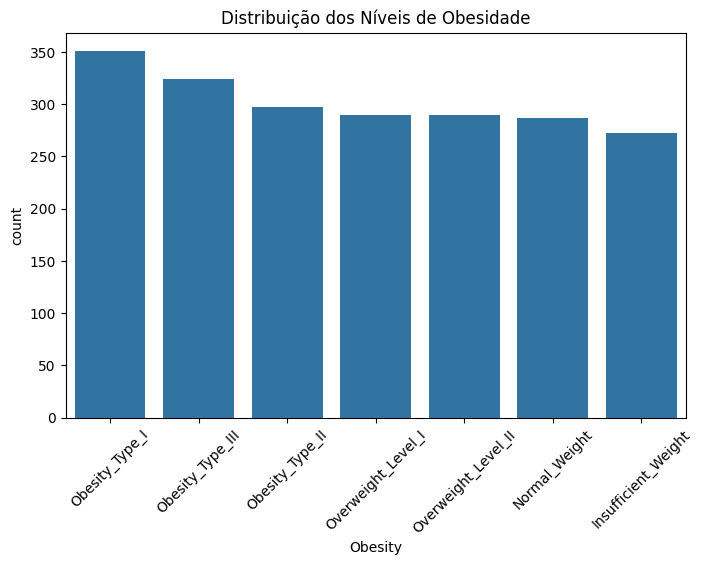

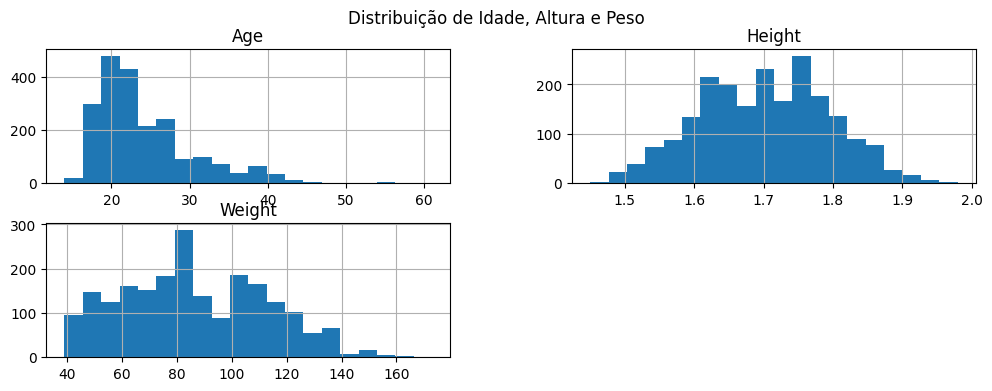

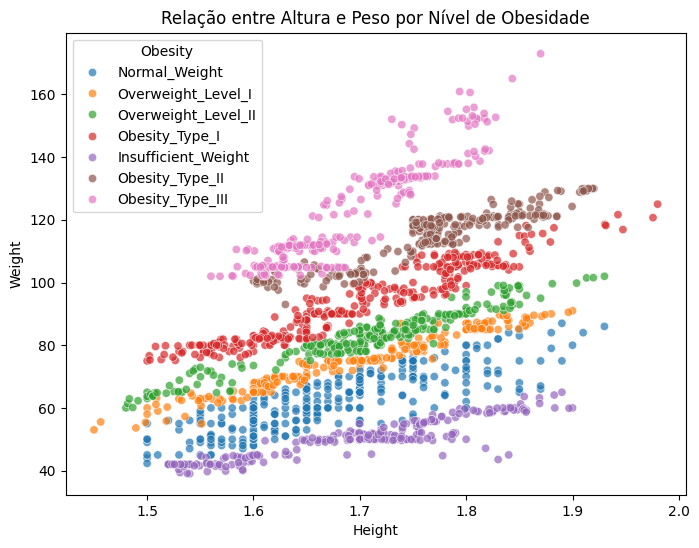

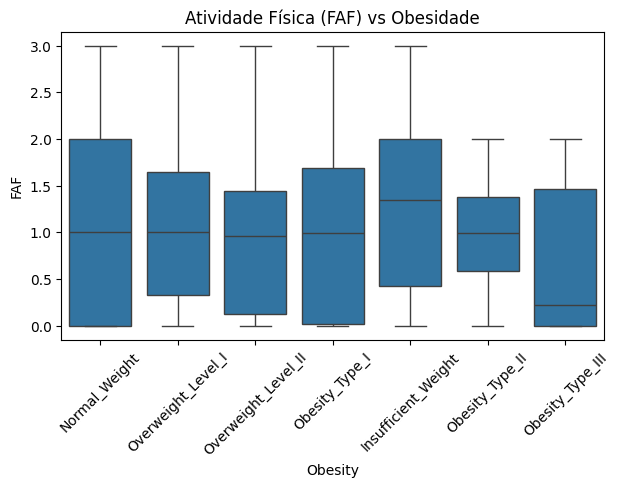

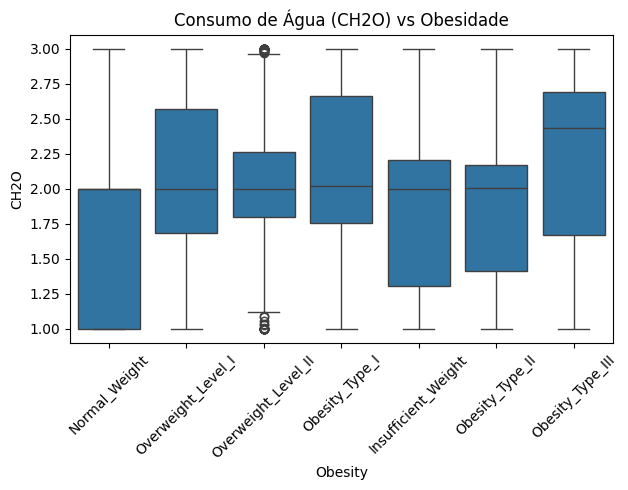

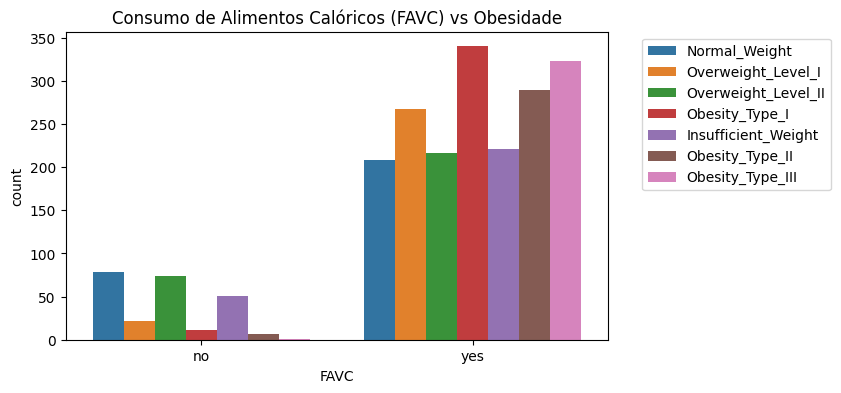


🔹 Treinando modelos com Label Encoding...


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression (LabelEnc): 87.23%
RandomForest (LabelEnc): 95.74%


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [20:03:55] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost (LabelEnc): 95.51%

🔹 Treinando modelos com One-Hot Encoding...
LogisticRegression (OneHot): 87.47%


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


RandomForest (OneHot): 94.33%


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [20:03:57] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost (OneHot): 95.51%

📊 RESULTADOS FINAIS:
LogisticRegression_LabelEnc: 87.23%
RandomForest_LabelEnc: 95.74%
XGBoost_LabelEnc: 95.51%
LogisticRegression_OneHot: 87.47%
RandomForest_OneHot: 94.33%
XGBoost_OneHot: 95.51%

🏆 Melhor modelo: RandomForest_LabelEnc com acurácia de 95.74%

Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       1.00      0.94      0.97        54
      Normal_Weight       0.85      0.97      0.90        58
     Obesity_Type_I       0.97      0.97      0.97        70
    Obesity_Type_II       0.98      0.98      0.98        60
   Obesity_Type_III       1.00      0.98      0.99        65
 Overweight_Level_I       0.95      0.90      0.92        58
Overweight_Level_II       0.96      0.95      0.96        58

           accuracy                           0.96       423
          macro avg       0.96      0.96      0.96       423
       weighted avg       0.96      0.96      0.96       423



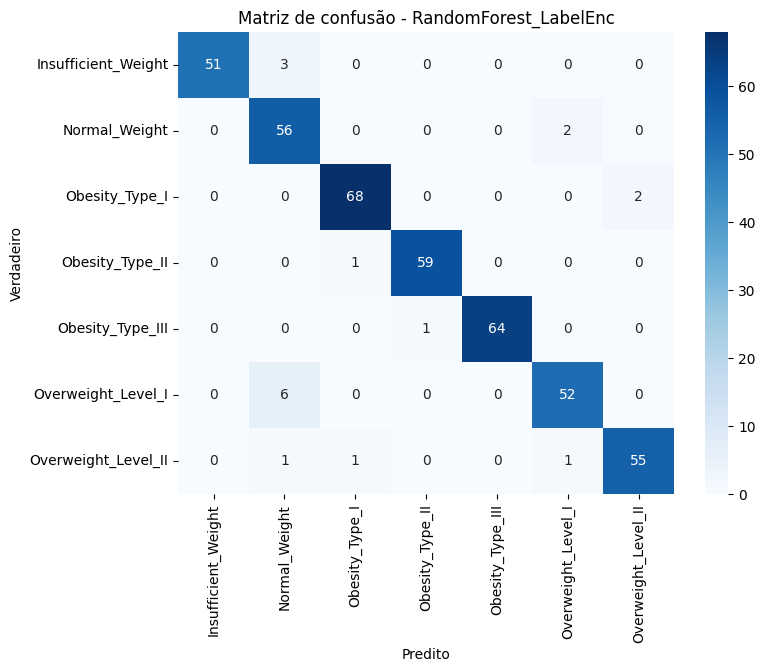

In [ ]:
# ==========================================
# TECH CHALLENGE FASE 4 - DATA ANALYTICS
# Predição de Obesidade
# ==========================================

# === 1. Importação de bibliotecas ===
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# ==============================================================
# === 2. Carregar e explorar os dados ===
# ==============================================================

df = pd.read_csv("Obesity.csv")

print("✅ Dataset carregado com sucesso!")
print("Shape:", df.shape)
print("\nVisualização inicial:")
print(df.head())

print("\nTipos de dados e valores nulos:")
print(df.info())

print("\nResumo estatístico:")
print(df.describe())

# ==============================================================
# === 3. Análise Exploratória (EDA) ===
# ==============================================================

# --- Distribuição das classes de obesidade ---
plt.figure(figsize=(8,5))
sns.countplot(data=df, x="Obesity", order=df["Obesity"].value_counts().index)
plt.title("Distribuição dos Níveis de Obesidade")
plt.xticks(rotation=45)
plt.show()

# --- Distribuições de variáveis numéricas ---
df[['Age','Height','Weight']].hist(bins=20, figsize=(12,4))
plt.suptitle("Distribuição de Idade, Altura e Peso")
plt.show()

# --- Relação entre Peso e Altura por classe ---
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="Height", y="Weight", hue="Obesity", alpha=0.7)
plt.title("Relação entre Altura e Peso por Nível de Obesidade")
plt.show()

# --- Relações comportamentais ---
plt.figure(figsize=(7,4))
sns.boxplot(data=df, x="Obesity", y="FAF")
plt.title("Atividade Física (FAF) vs Obesidade")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(7,4))
sns.boxplot(data=df, x="Obesity", y="CH2O")
plt.title("Consumo de Água (CH2O) vs Obesidade")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(7,4))
sns.countplot(data=df, x="FAVC", hue="Obesity")
plt.title("Consumo de Alimentos Calóricos (FAVC) vs Obesidade")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# ==============================================================
# === 4. Preparação dos dados ===
# ==============================================================

X = df.drop("Obesity", axis=1)
y = df["Obesity"]

num_features = X.select_dtypes(include=["float64", "int64"]).columns
cat_features = X.select_dtypes(include=["object"]).columns

# LabelEncoder para o target
le_y = LabelEncoder()
y_encoded = le_y.fit_transform(y)

# Divisão treino/teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# ==============================================================
# === 5. LABEL ENCODING PIPELINE ===
# ==============================================================

X_label = X.copy()
le = LabelEncoder()
for col in cat_features:
    X_label[col] = le.fit_transform(X_label[col])

X_train_label, X_test_label, y_train_label, y_test_label = train_test_split(
    X_label, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# Normalização
scaler = StandardScaler()
X_train_label[num_features] = scaler.fit_transform(X_train_label[num_features])
X_test_label[num_features] = scaler.transform(X_test_label[num_features])

# Modelos
models = {
    "LogisticRegression": LogisticRegression(max_iter=1000, solver="lbfgs", multi_class="multinomial"),
    "RandomForest": RandomForestClassifier(n_estimators=150, random_state=42),
    "XGBoost": XGBClassifier(eval_metric="mlogloss", random_state=42, use_label_encoder=False)
}

results = {}

print("\n🔹 Treinando modelos com Label Encoding...")
for name, model in models.items():
    model.fit(X_train_label, y_train_label)
    preds = model.predict(X_test_label)
    acc = accuracy_score(y_test_label, preds)
    results[f"{name}_LabelEnc"] = round(acc * 100, 2)
    print(f"{name} (LabelEnc): {acc*100:.2f}%")

# ==============================================================
# === 6. ONE-HOT ENCODING PIPELINE ===
# ==============================================================

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_features),
    ]
)

print("\n🔹 Treinando modelos com One-Hot Encoding...")
for name, model in models.items():
    pipe = Pipeline(steps=[("preprocessor", preprocessor), ("classifier", model)])
    pipe.fit(X_train, y_train)
    preds = pipe.predict(X_test)
    acc = accuracy_score(y_test, preds)
    results[f"{name}_OneHot"] = round(acc * 100, 2)
    print(f"{name} (OneHot): {acc*100:.2f}%")

# ==============================================================
# === 7. Resultados finais e matriz de confusão ===
# ==============================================================

print("\n📊 RESULTADOS FINAIS:")
for key, value in results.items():
    print(f"{key}: {value}%")

best_model_name = max(results, key=results.get)
print(f"\n🏆 Melhor modelo: {best_model_name} com acurácia de {results[best_model_name]}%")

# Avaliar o melhor modelo
encoding_type = "LabelEnc" if "LabelEnc" in best_model_name else "OneHot"
model_name = best_model_name.replace(f"_{encoding_type}", "")
best_model = models[model_name]

if encoding_type == "LabelEnc":
    best_model.fit(X_train_label, y_train_label)
    preds_best = best_model.predict(X_test_label)
else:
    pipe_best = Pipeline(steps=[("preprocessor", preprocessor), ("classifier", best_model)])
    pipe_best.fit(X_train, y_train)
    preds_best = pipe_best.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, preds_best, target_names=le_y.classes_))

cm = confusion_matrix(y_test, preds_best)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=le_y.classes_, yticklabels=le_y.classes_)
plt.xlabel("Predito")
plt.ylabel("Verdadeiro")
plt.title(f"Matriz de confusão - {best_model_name}")
plt.show()


In [ ]:
!pip install streamlit ngrok scikit-learn pandas xgboost -q


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 75.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 50.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 73.0 MB/s eta 0:00:00


In [ ]:
%%writefile app.py
import streamlit as st
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

st.set_page_config(page_title="Preditor de Obesidade", layout="wide")

st.title("Preditor de Nível de Obesidade")
st.markdown("Preveja o nível de obesidade com base em dados pessoais e hábitos alimentares.")

@st.cache_resource
def load_model():
    df = pd.read_csv("Obesity.csv")
    X = df.drop("Obesity", axis=1)
    y = df["Obesity"]
    num_features = X.select_dtypes(include=["float64", "int64"]).columns
    cat_features = X.select_dtypes(include=["object"]).columns

    preprocessor = ColumnTransformer([
        ("num", StandardScaler(), num_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_features)
    ])
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    pipeline = Pipeline(steps=[("preprocessor", preprocessor), ("classifier", model)])
    pipeline.fit(X, y)
    return pipeline

model = load_model()

st.sidebar.header(" Informações")
gender = st.sidebar.selectbox("Gênero", ["Male", "Female"])
age = st.sidebar.slider("Idade", 10, 80, 25)
height = st.sidebar.number_input("Altura (m)", 1.3, 2.1, 1.70)
weight = st.sidebar.number_input("Peso (kg)", 30.0, 200.0, 70.0)

st.sidebar.header("Hábitos")
family_history = st.sidebar.selectbox("Histórico familiar", ["yes", "no"])
FAVC = st.sidebar.selectbox("Alimentos calóricos frequentes?", ["yes", "no"])
FCVC = st.sidebar.slider("Vegetais (1 = pouco, 3 = muito)", 1.0, 3.0, 2.0)
NCP = st.sidebar.slider("Refeições principais/dia", 1.0, 4.0, 3.0)
CAEC = st.sidebar.selectbox("Lanches entre refeições", ["no", "Sometimes", "Frequently", "Always"])
SMOKE = st.sidebar.selectbox("Fuma?", ["yes", "no"])
CH2O = st.sidebar.slider("Água (litros/dia)", 1.0, 3.0, 2.0)
SCC = st.sidebar.selectbox("Monitora calorias?", ["yes", "no"])
FAF = st.sidebar.slider("Atividade física (0–3)", 0.0, 3.0, 1.0)
TUE = st.sidebar.slider("Uso de tecnologia (0–2)", 0.0, 2.0, 1.0)
CALC = st.sidebar.selectbox("Álcool", ["no", "Sometimes", "Frequently", "Always"])
MTRANS = st.sidebar.selectbox("Transporte", ["Walking", "Bike", "Motorbike", "Public_Transportation", "Automobile"])

input_data = pd.DataFrame({
    "Gender": [gender], "Age": [age], "Height": [height], "Weight": [weight],
    "family_history": [family_history], "FAVC": [FAVC], "FCVC": [FCVC],
    "NCP": [NCP], "CAEC": [CAEC], "SMOKE": [SMOKE], "CH2O": [CH2O],
    "SCC": [SCC], "FAF": [FAF], "TUE": [TUE], "CALC": [CALC], "MTRANS": [MTRANS]
})

if st.button(" Prever"):
    result = model.predict(input_data)[0]
    st.success(f"**Nível previsto:** {result}")
    if "Obesity_Type" in result:
        st.warning("⚠️ O modelo indica obesidade. Procure acompanhamento médico.")
    elif "Overweight" in result:
        st.info("📉 O modelo indica sobrepeso. Pequenas mudanças podem ajudar.")
    else:
        st.success("✅ Peso normal! Continue com hábitos saudáveis.")


Overwriting app.py


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving app.py to app (1).py


In [ ]:
!pip install pyngrok -q


In [ ]:
!pip install pyngrok -q
!pip install streamlit -q

# Apaga possíveis configs antigas
!rm -rf /root/.ngrok2

# Configure seu authtoken (use exatamente o token da sua conta ngrok)
!ngrok config add-authtoken 33teDe4qWieiBnfos8iTzcmSVmy_73nEbCXwLd4qp48SoBaK1


Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
from pyngrok import ngrok

# Inicia o app Streamlit em segundo plano
!streamlit run app.py &>/dev/null &

# Cria o túnel público
url = ngrok.connect(8501)
print("🌐 Acesse o app aqui:", url)


🌐 Acesse o app aqui: NgrokTunnel: "https://toccara-unerasable-besiegingly.ngrok-free.dev" -> "http://localhost:8501"


2025-10-12 20:12:49.548 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-12 20:12:49.549 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-12 20:12:49.735 
  command:

    streamlit run /usr/local/lib/python3.12/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-10-12 20:12:49.736 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-12 20:12:49.737 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-12 20:12:49.740 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-12 20:12:49.741 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when runn

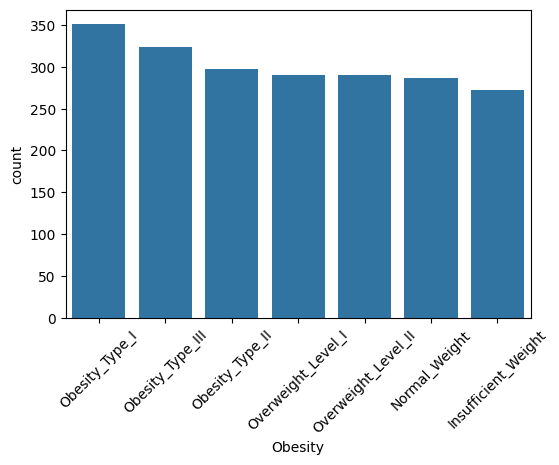

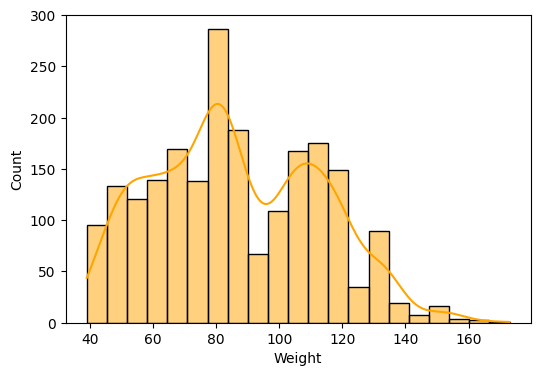

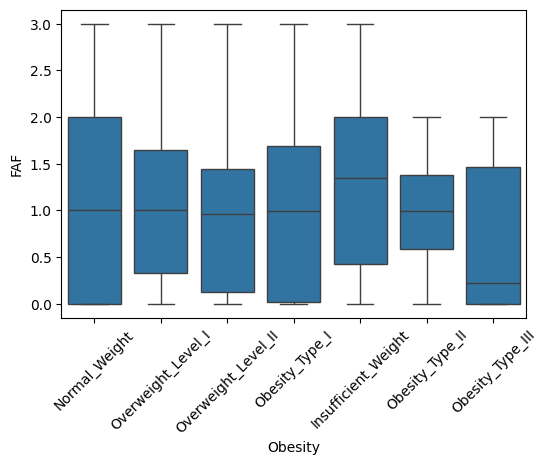

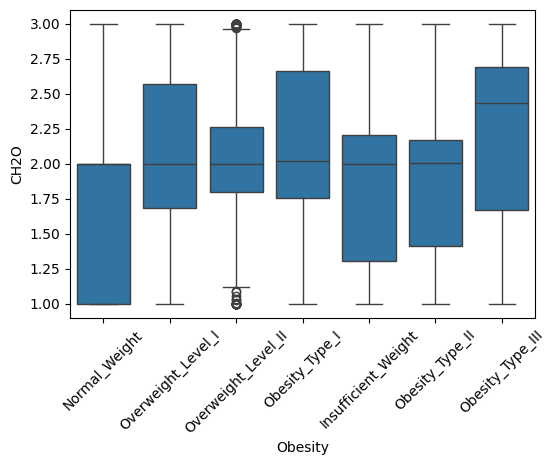

In [ ]:
# ==========================================
# APP STREAMLIT - Predição e Análise de Obesidade (versão com abas)
# ==========================================
import streamlit as st
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

# ------------------------------------------
# CONFIGURAÇÃO DA PÁGINA
# ------------------------------------------
st.set_page_config(page_title="Sistema de Obesidade", page_icon="💪", layout="wide")

st.title("💪 Sistema Preditivo e Analítico de Obesidade")
st.markdown("""
Aplicativo desenvolvido para o **Tech Challenge - Fase 4 (Pós Tech em Data Analytics)**
Use as abas abaixo para navegar entre a **análise exploratória** e o **modelo preditivo**.

---
""")

# ------------------------------------------
# CARREGAR DADOS E MODELO
# ------------------------------------------
@st.cache_resource
def load_data_model():
    df = pd.read_csv("Obesity.csv")
    X = df.drop("Obesity", axis=1)
    y = df["Obesity"]
    num_features = X.select_dtypes(include=["float64", "int64"]).columns
    cat_features = X.select_dtypes(include=["object"]).columns

    preprocessor = ColumnTransformer([
        ("num", StandardScaler(), num_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_features)
    ])
    model = RandomForestClassifier(n_estimators=150, random_state=42)
    pipe = Pipeline(steps=[("preprocessor", preprocessor), ("classifier", model)])
    pipe.fit(X, y)

    return df, pipe

df, model = load_data_model()

# ------------------------------------------
# CRIAR ABAS
# ------------------------------------------
tab1, tab2 = st.tabs(["📊 Painel Analítico", "🔮 Preditor de Obesidade"])

# ====================================================
# ABA 1 – PAINEL ANALÍTICO
# ====================================================
with tab1:
    st.header("📈 Painel Analítico - Insights sobre Obesidade")

    col1, col2 = st.columns(2)
    with col1:
        st.subheader("Distribuição dos Níveis de Obesidade")
        fig1, ax1 = plt.subplots(figsize=(6,4))
        sns.countplot(data=df, x="Obesity", order=df["Obesity"].value_counts().index, ax=ax1)
        plt.xticks(rotation=45)
        st.pyplot(fig1)

    with col2:
        st.subheader("Distribuição de Peso")
        fig2, ax2 = plt.subplots(figsize=(6,4))
        sns.histplot(df["Weight"], kde=True, color="orange", ax=ax2)
        st.pyplot(fig2)

    st.markdown("---")
    col3, col4 = st.columns(2)
    with col3:
        st.write("**Atividade Física (FAF) por Nível de Obesidade**")
        fig3, ax3 = plt.subplots(figsize=(6,4))
        sns.boxplot(data=df, x="Obesity", y="FAF", ax=ax3)
        plt.xticks(rotation=45)
        st.pyplot(fig3)

    with col4:
        st.write("**Consumo de Água (CH2O) por Nível de Obesidade**")
        fig4, ax4 = plt.subplots(figsize=(6,4))
        sns.boxplot(data=df, x="Obesity", y="CH2O", ax=ax4)
        plt.xticks(rotation=45)
        st.pyplot(fig4)

    st.markdown("---")
    st.subheader("💡 Principais Insights:")
    st.markdown("""
    - Pessoas com **baixo nível de atividade física (FAF)** concentram-se nas classes de **obesidade**.
    - **Baixo consumo de água (CH2O)** está associado a **maiores níveis de obesidade**.
    - O **histórico familiar positivo** e o **consumo de alimentos calóricos (FAVC)** são fatores fortemente correlacionados.
    - O grupo com **peso normal** apresenta maior variação em atividade física e alimentação equilibrada.
    """)

# ====================================================
# ABA 2 – PREDITOR DE OBESIDADE
# ====================================================
with tab2:
    st.header("🔮 Preditor de Nível de Obesidade")
    st.markdown("Preencha as informações abaixo para estimar o nível de obesidade.")

    col1, col2 = st.columns(2)

    with col1:
        gender = st.selectbox("Gênero", ["Male", "Female"])
        age = st.slider("Idade", 10, 80, 25)
        height = st.number_input("Altura (m)", 1.3, 2.1, 1.70)
        weight = st.number_input("Peso (kg)", 30.0, 200.0, 70.0)
        family_history = st.selectbox("Histórico familiar", ["yes", "no"])
        FAVC = st.selectbox("Alimentos calóricos frequentemente?", ["yes", "no"])
        FCVC = st.slider("Vegetais (1 = pouco, 3 = muito)", 1.0, 3.0, 2.0)

    with col2:
        NCP = st.slider("Refeições principais/dia", 1.0, 4.0, 3.0)
        CAEC = st.selectbox("Lanches entre refeições", ["no", "Sometimes", "Frequently", "Always"])
        SMOKE = st.selectbox("Fuma?", ["yes", "no"])
        CH2O = st.slider("Água (litros/dia)", 1.0, 3.0, 2.0)
        SCC = st.selectbox("Monitora calorias?", ["yes", "no"])
        FAF = st.slider("Atividade física (0–3)", 0.0, 3.0, 1.0)
        TUE = st.slider("Uso de tecnologia (0–2)", 0.0, 2.0, 1.0)
        CALC = st.selectbox("Álcool", ["no", "Sometimes", "Frequently", "Always"])
        MTRANS = st.selectbox("Transporte", ["Walking", "Bike", "Motorbike", "Public_Transportation", "Automobile"])

    input_data = pd.DataFrame({
        "Gender": [gender], "Age": [age], "Height": [height], "Weight": [weight],
        "family_history": [family_history], "FAVC": [FAVC], "FCVC": [FCVC],
        "NCP": [NCP], "CAEC": [CAEC], "SMOKE": [SMOKE], "CH2O": [CH2O],
        "SCC": [SCC], "FAF": [FAF], "TUE": [TUE], "CALC": [CALC], "MTRANS": [MTRANS]
    })

    if st.button("🚀 Prever Nível de Obesidade"):
        prediction = model.predict(input_data)[0]
        st.success(f"**Nível previsto:** {prediction}")

        if "Obesity_Type" in prediction:
            st.warning("⚠️ O modelo indica obesidade. Recomendado acompanhamento médico.")
        elif "Overweight" in prediction:
            st.info("📉 Indica sobrepeso. Mudanças leves em hábitos podem ajudar.")
        else:
            st.success("✅ Peso saudável! Continue com bons hábitos.")


In [ ]:
!streamlit run app.py &>/dev/null &
from pyngrok import ngrok
url = ngrok.connect(8501)
print("🌐 Acesse o app aqui:", url)


🌐 Acesse o app aqui: NgrokTunnel: "https://toccara-unerasable-besiegingly.ngrok-free.dev" -> "http://localhost:8501"


In [ ]:
!pip install -U streamlit -q
